# 4 - Clasificación de imagen

<br>
<br>

<img src="https://raw.githubusercontent.com/Hack-io-AI/ai_images/main/img_classification.webp" style="width:400px;"/>

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1---Modelos-de-clasificación-de-imagen" data-toc-modified-id="1---Modelos-de-clasificación-de-imagen-1">1 - Modelos de clasificación de imagen</a></span></li><li><span><a href="#2---Pipeline-de-Transformers-para-clasificación-de-imágenes" data-toc-modified-id="2---Pipeline-de-Transformers-para-clasificación-de-imágenes-2">2 - Pipeline de Transformers para clasificación de imágenes</a></span></li><li><span><a href="#3---Usando-el-modelo-clasificador" data-toc-modified-id="3---Usando-el-modelo-clasificador-3">3 - Usando el modelo clasificador</a></span><ul class="toc-item"><li><span><a href="#3.1---Procesador-de-imágenes" data-toc-modified-id="3.1---Procesador-de-imágenes-3.1">3.1 - Procesador de imágenes</a></span></li><li><span><a href="#3.2---Modelo-clasificador-de-imágenes" data-toc-modified-id="3.2---Modelo-clasificador-de-imágenes-3.2">3.2 - Modelo clasificador de imágenes</a></span></li><li><span><a href="#3.3---Resumen-del-código" data-toc-modified-id="3.3---Resumen-del-código-3.3">3.3 - Resumen del código</a></span></li></ul></li><li><span><a href="#4---Uso-del-modelo-desde-el-hub" data-toc-modified-id="4---Uso-del-modelo-desde-el-hub-4">4 - Uso del modelo desde el hub</a></span></li><li><span><a href="#5---Más-modelos-de-clasificación-de-imágenes" data-toc-modified-id="5---Más-modelos-de-clasificación-de-imágenes-5">5 - Más modelos de clasificación de imágenes</a></span><ul class="toc-item"><li><span><a href="#5.1---Clasificación-de-edad" data-toc-modified-id="5.1---Clasificación-de-edad-5.1">5.1 - Clasificación de edad</a></span></li><li><span><a href="#5.2---Detección-de-fuego" data-toc-modified-id="5.2---Detección-de-fuego-5.2">5.2 - Detección de fuego</a></span></li><li><span><a href="#5.3---Detección-de-género" data-toc-modified-id="5.3---Detección-de-género-5.3">5.3 - Detección de género</a></span></li></ul></li></ul></div>

## 1 - Modelos de clasificación de imagen

Los modelos de clasificación de imágenes son una categoría de algoritmos de aprendizaje automático diseñados para identificar y etiquetar objetos dentro de una imagen. Estos modelos son fundamentales en muchas aplicaciones de visión por computador, incluyendo la detección de objetos, el reconocimiento facial y la interpretación de imágenes médicas. Hugging Face es una plataforma conocida principalmente por sus modelos de NLP, pero también ha expandido su biblioteca para incluir modelos de visión por computador, incluyendo modelos de clasificación de imágenes.



**Modelos de Clasificación de Imágenes en Hugging Face**

Hugging Face proporciona una variedad de modelos preentrenados para la clasificación de imágenes que se pueden encontrar en su bibliotecas transformers, diffusers y en datasets. Estos modelos se pueden utilizar directamente o se pueden ajustar con fine tuning para tareas específicas.


+ **Vision Transformer (ViT)**: ViT es un modelo basado en transformadores que se ha adaptado para la visión por computador. Fue introducido por Google y ha demostrado un rendimiento competitivo en tareas de clasificación de imágenes.


+ **DeiT (Data-efficient Image Transformer)**: DeiT es una variante del Vision Transformer que ha sido entrenada de manera más eficiente, utilizando menos datos y recursos.


+ **ConvNeXT**: ConvNeXT es una arquitectura de red convolucional moderna diseñada para aprovechar lo mejor de las arquitecturas convolucionales y los avances recientes en los transformadores.


**Ventajas de utilizar Hugging Face para la clasificación de imágenes**


+ **Facilidad de uso**: Las bibliotecas transformers y diffusers de Hugging Face proporcionan una API consistente y fácil de usar para cargar modelos, preprocesar datos y realizar inferencias.


+ **Acceso a modelos preentrenados**: Los usuarios tienen acceso a una amplia variedad de modelos preentrenados, lo que ahorra tiempo y recursos en el entrenamiento desde cero.


+ **Transferencia de aprendizaje**: Los modelos pueden ser ajustados para tareas específicas utilizando datasets personalizados, lo que permite adaptarlos a necesidades particulares.


+ **Integración con otras herramientas**: Los modelos de Hugging Face se pueden integrar fácilmente con otras bibliotecas de Python y frameworks de aprendizaje automático, como TensorFlow y PyTorch.

## 2 - Pipeline de Transformers para clasificación de imágenes

Vamos a usar un [Vision Transformer](https://huggingface.co/google/vit-base-patch16-224) (ViT) de Google. El modelo está preentrenado en ImageNet-21k, con 14 millones de imágenes y  21843 clases, a una resolución de 224x224, y afinado en ImageNet 2012, con 1 millón de imágenes y 1000 clases, a una resolución de 224x224. Fue introducido en el artículo [An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929) por Dosovitskiy et al. y se lanzó por primera vez en Hugging Face. Sin embargo, los pesos fueron convertidos del repositorio por Ross Wightman, quien ya había convertido los pesos de JAX a PyTorch. 


Las imágenes se presentan al modelo como una secuencia de paquetes de tamaño fijo, con una resolución 16x16, que se incrustan linealmente. También se añade un token [CLS] al inicio de una secuencia para utilizarlo en tareas de clasificación. 

Al preentrenar el modelo, aprende una representación interna de las imágenes que luego puede utilizarse para extraer características útiles para tareas posteriores, si tenemos un conjunto de datos de imágenes etiquetadas, por ejemplo, podemos entrenar un clasificador estándar colocando una capa lineal sobre el codificador preentrenado. Típicamente, se coloca una capa lineal sobre el token [CLS], ya que el último estado oculto de este token puede verse como una representación de toda la imagen. La idea fundamental es usar un clasificador de texto para clasificar imágenes.

Vamos a usar este modelo a través del pipeline de transformers. Tiene un peso aproximado de 350Mb.

In [1]:
# importamos desde la librería transformers el pipeline

from transformers import pipeline

In [2]:
# definimos la tarea y el modelo

tarea = 'image-classification'  

modelo = 'google/vit-base-patch16-224'

In [3]:
# iniciamos el clasificador de imagenes, los modelos se descargan en local, en este caso son unos 350Mb

img_pipe = pipeline(task=tarea, model=modelo)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


La imagen que recibe el pipeline puede ser desde un archivo en local, como la imagen que ya hemos usado de Shinjuku, simplemente dándole la ruta al archivo. Veámoslo:

In [4]:
# llamada al pipeline con imagen en local

img_pipe('../../../images/shinjuku.jpeg')

[{'label': 'traffic light, traffic signal, stoplight',
  'score': 0.1286764144897461},
 {'label': 'cab, hack, taxi, taxicab', 'score': 0.09040070325136185},
 {'label': 'cinema, movie theater, movie theatre, movie house, picture palace',
  'score': 0.04508170485496521},
 {'label': 'bell cote, bell cot', 'score': 0.04384763538837433},
 {'label': 'street sign', 'score': 0.042347900569438934}]

Vemos que la salida del pipeline es una lista de diccionarios, donde cada uno tiene la etiqueta detectada y la probabilidad de que sea esa etiqueta. Es decir, simplemente nos dice que hay en la imagen y con qué probabilidad. En este caso estamos usando una imagen con muchos objetos, por lo que no hay ninguna etiqueta que salga con mucha probabilidad. La etiqueta con más probabilidad es "luces de tráfico". 


Hagamos otro ejemplo, porque también podemos usar el pipeline dándole una url de una imagen directamente. Usaremos la imagen de un [gato siamés](https://www.purina.es/sites/default/files/styles/square_medium_440x440/public/2024-02/sitesdefaultfilesstylessquare_medium_440x440public2022-06Siamese-Cat_0.jpg?itok=SpejPfbc) para la clasificación.

In [5]:
# imagen de gato

url_gato = 'https://www.purina.es/sites/default/files/styles/square_medium_440x440/public/2024-02/sitesdefaultfilesstylessquare_medium_440x440public2022-06Siamese-Cat_0.jpg?itok=SpejPfbc'

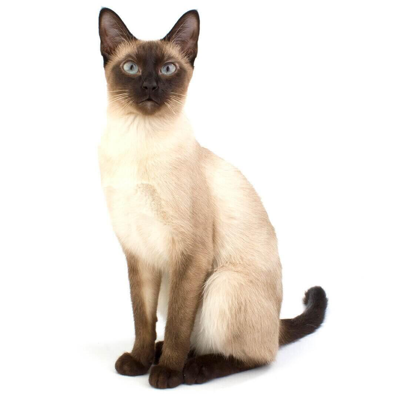

In [6]:
# visualizamos la imagen con PIL en 400x400 píxeles

from PIL import Image
import requests as req

imagen = Image.open(req.get(url_gato, stream=True).raw)

imagen.resize((400, 400))

In [7]:
# llamada al pipeline para la clasificación de la imagen

img_pipe(url_gato)

[{'label': 'Siamese cat, Siamese', 'score': 0.9957571625709534},
 {'label': 'Egyptian cat', 'score': 0.001598466420546174},
 {'label': 'lynx, catamount', 'score': 0.00039852471672929823},
 {'label': 'tabby, tabby cat', 'score': 0.00019002299814019352},
 {'label': 'Persian cat', 'score': 8.404441177845001e-05}]

En este caso el modelo clasifica correctamente la imagén como "gato siamés" con un 99.5% de probabilidad. Por supuesto, es lo único que hay en la imagen, por lo que el modelo lo identifica mucho mejor que en la anterior imagen. Veamos otro ejemplo con una imagen de [fuego](https://i.pinimg.com/736x/1c/ee/b6/1ceeb6c650802b171763c969bc3a9a79.jpg) a ver que tal lo clasifica el modelo. Esta vez usaremos el objeto PIL como argumento de entrada del pipeline.

In [8]:
# imagen de fuego

url_fuego = 'https://i.pinimg.com/736x/1c/ee/b6/1ceeb6c650802b171763c969bc3a9a79.jpg'

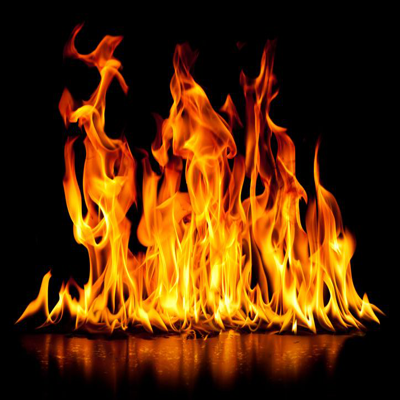

In [9]:
# visualizamos la imagen con PIL en 400x400 píxeles

imagen = Image.open(req.get(url_fuego, stream=True).raw)

imagen.resize((400, 400))

In [10]:
# llamada al pipeline para la clasificación de la imagen

img_pipe(imagen)

[{'label': 'fire screen, fireguard', 'score': 0.51747065782547},
 {'label': 'candle, taper, wax light', 'score': 0.0835137814283371},
 {'label': 'stove', 'score': 0.05335650593042374},
 {'label': "jack-o'-lantern", 'score': 0.03723558038473129},
 {'label': 'torch', 'score': 0.03212280943989754}]

En este ejemplo el modelo clasifica la imagen como "fuego" con un 52.5% de probabilidad. También devuelve etiquetas como "vela", "estufa" o "antorcha" con muy baja probabilidad.

## 3 - Usando el modelo clasificador

In [11]:
# importamos los objetos procesador y modelo de clasificación de imagenes

from transformers import ViTImageProcessor, ViTForImageClassification

### 3.1 - Procesador de imágenes

ViTImageProcessor es un objeto para preprocesar imágenes antes de ingresarlas a un modelo ViT. Este objeto realiza varios procesos para transformar las imágenes de entrada en el formato adecuado para el modelo. Primero redimensiona las imágenes a 224x224 píxeles, luego reescala los valores en función de una valor de escala y por último normaliza los valores de la imagen pasando de (0, 255) a (-1, 1).

In [12]:
# transforma las imágenes 

procesador = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')

In [13]:
# descripcion del objeto

procesador

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

**Componentes de ViTImageProcessor**:


+ **_valid_processor_keys**: Una lista de claves válidas que se pueden utilizar en este procesador. 


+ **do_normalize**: Indica si se debe normalizar la imagen. En este caso, está configurado como true, lo que significa que se aplicará la normalización a las imágenes.


+ **do_rescale**: Indica si se debe reescalar la imagen. Aquí también está configurado como true.


+ **do_resize**: Indica si se debe cambiar el tamaño de la imagen. Configurado como true, lo que significa que las imágenes se redimensionarán.


+ **image_mean**: Una lista de tres valores que representan la media de los canales de color de la imagen RGB. En este caso, todos los valores son 0.5.


+ **image_processor_type**: Indica el tipo de procesador de imagen que se está utilizando. Aquí se especifica como ViTImageProcessor.


+ **image_std**: Una lista de tres valores que representan la desviación estándar de los canales de color de la imagen. En este caso, todos los valores son 0.5.


+ **resample**: Especifica el método de remuestreo que se utilizará al redimensionar la imagen. El valor 2 corresponde a PIL.Image.BILINEAR, que es un método común de remuestreo bilineal.


+ **rescale_factor**: Factor por el cual se reescala la imagen. En este caso, el factor es 0.00392156862745098, que es igual a 1/255, lo que normaliza los valores de los píxeles de (0, 255) a (-1, 1).


+ **size**: Un diccionario que define el tamaño al cual se redimensionarán las imágenes. En este caso, las imágenes se redimensionarán a una altura y anchura de 224 píxeles.



In [14]:
# transformación de la imagen

img_procesada = procesador(images=imagen, return_tensors='pt')

In [16]:
# una imagen, 3 canales, 224X224 píxeles

img_procesada['pixel_values'].shape

torch.Size([1, 3, 224, 224])

In [17]:
# mínimo y máximo de la imagen procesada

img_procesada['pixel_values'].min(), img_procesada['pixel_values'].max()

(tensor(-1.), tensor(1.))

Veamos las dimensiones de la imagen original, su máximo y su mínimo. Primero vamos a convertir la imagen a un array de numpy para hacer los cálculos.

In [18]:
# importamos numpy

import numpy as np

In [19]:
# dimensión de la imagen original

np.array(imagen).shape

(483, 724, 3)

In [20]:
# mínimo y máximo de la imagen original

np.array(imagen).min(), np.array(imagen).max()

(0, 255)

### 3.2 - Modelo clasificador de imágenes

ViTForImageClassification es un modelo de clasificación de imágenes basado en Vision Transformer, ViT. Originalmente diseñados para tareas de procesamiento de lenguaje natural, los Transformers son modelos que utilizan mecanismos de atención para procesar datos secuenciales de manera eficiente. ViT adapta la arquitectura Transformer para tareas de visión por computadora. En lugar de procesar imágenes píxel por píxel, ViT divide una imagen en paquetes, pequeños bloques, y trata cada paquete como una "palabra" en una secuencia, similar a cómo los Transformers procesan secuencias de texto.


**Componentes principales de ViT**


+ **División en paquetes**: La imagen de entrada se divide en paquetes de tamaño fijo, por ejemplo, 16x16 píxeles. Cada paquetes se convierte en un vector de características lineales.


+ **Codificación posicional**: Se agrega información de posición a cada paquete para que el modelo pueda entender la relación espacial entre los paquetes.


+ **Capas de Transformadores**: Los paquetes con sus codificaciones posicionales se pasan a través de múltiples capas de Transformadores. Cada capa incluye mecanismos de atención y redes neuronales feed-forward.


+ **Clasificación**: La salida del Transformador se pasa a una capa de clasificación para predecir la clase de la imagen.

In [21]:
# inicializacion del modelo ViT

modelo_vit = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

In [22]:
# descripcion del objeto

modelo_vit

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

**Componentes del Modelo ViTForImageClassification**


1. **ViTModel**: Este es el núcleo del modelo ViT, que se compone principalmente de la capa de embeddings y el encoder Transformer.


2. **embeddings (ViTEmbeddings)**:

    + patch_embeddings (ViTPatchEmbeddings):
    
        + projection: Una capa de convolución 2D que toma una imagen de entrada con 3 canales de color (RGB) y la divide en paquetes. Cada paquete se proyecta a un espacio de características de dimensión 768. El tamaño del kernel y el stride son ambos de 16, lo que significa que la imagen se divide en paquetes de 16x16 píxeles.
        
    + dropout: Una capa de dropout con una probabilidad de 0.0, que ayuda a prevenir el sobreajuste durante el entrenamiento.


3. **encoder (ViTEncoder)**:

    + layer (ModuleList): Contiene 12 capas de ViTLayer, que son las capas Transformer.


4. **ViTLayer**. Cada capa de ViTLayer contiene varios submódulos:

    + attention (ViTAttention):
    
        + attention (ViTSelfAttention):
            + query, key, value: Capas lineales que proyectan las entradas al espacio de consulta, clave y valor respectivamente, cada una con 768 características de entrada y salida.
            + dropout: Una capa de dropout con una probabilidad de 0.0.
            
        + output (ViTSelfOutput):
            + dense: Una capa lineal que toma la salida del mecanismo de atención y la proyecta de nuevo al espacio de características de 768.
            + dropout: Una capa de dropout con una probabilidad de 0.0.
            
    + intermediate (ViTIntermediate):
    
        + dense: Una capa lineal que proyecta las características de 768 a 3072.
        
        + intermediate_act_fn: Función de activación GELU (Gaussian Error Linear Unit), que se utiliza para introducir no linealidades en el modelo.
        
    + output (ViTOutput):
    
        + dense: Una capa lineal que proyecta las características de 3072 de vuelta a 768.
        
        + dropout: Una capa de dropout con una probabilidad de 0.0.
        
    + layernorm_before y layernorm_after: Capas de normalización de capa (Layer Normalization) que normalizan las entradas antes y después de los bloques de atención y feed-forward, respectivamente.


5. **layernorm**: Una capa de normalización de capa final con 768 características de entrada, que se aplica antes de la clasificación final.


6. **classifier**: Una capa lineal que toma las 768 características de la salida del encoder y las proyecta a 1000 salidas, correspondientes a las 1000 clases del conjunto de datos ImageNet, que es comúnmente utilizado para preentrenar modelos de clasificación de imágenes.


**Resumen del flujo de datos**


1. División en paquetes: La imagen de entrada se divide en paquetes de 16x16 píxeles mediante la capa de convolución (patch_embeddings).


2. Embedding y dropout: Los paquetes se proyectan a un espacio de características de 768 dimensiones y se aplica dropout.


3. Transformers: Los embeddings de los paquetes se pasan a través de 12 capas Transformer, donde cada capa realiza operaciones de atención y feed-forward, con normalización de capa aplicada antes y después de estas operaciones.


4. Normalización Final: La salida del encoder se normaliza utilizando una capa de normalización de capa.


5. Clasificación: Las características normalizadas se pasan a través de una capa lineal que produce las predicciones de clase finales.

In [23]:
# resultado del modelo Vit al darle el vector

tensor = modelo_vit(**img_procesada).logits

In [24]:
# dimensión del tensor de salida

tensor.shape

torch.Size([1, 1000])

Vemos que las dimensiones del tensor de salida son (1, 1000), es decir, una predicción de entre mil clases que podemos predecir con este modelo. Para saber cuál es la predicción solamente tenemos que calcular el argumento máximo del tensor de salida. Recordemos que el argumento máximo nos dice en qué posición, el índice, está el valor más alto, la probabilidad más alta. Hagámoslo:

In [25]:
# predicción numérica del modelo

tensor.argmax().item()

556

Ahora sabemos que la etiqueta 556 es la predicción del modelo. Pero, ¿cuál es la etiqueta 556?. En la configuración del modelo está el diccionario con todas las etiquetas que el modelo es capaz de identificar. Tan solo tenemos que usar la predicción numérica que devuelve el modelo como clave en ese diccionario para obtener la predicción como etiqueta.

In [26]:
# diccionario de etiquetas

etiquetas = modelo_vit.config.id2label

In [28]:
# etiqueta predicha

etiquetas[tensor.argmax().item()]

'fire screen, fireguard'

Usando el argumento máximo se nos devuelve la etiqueta con más probabilidad. Si quisiéramos sacar, por ejemplo, las 10 etiquetas más probables, tenemos que ordenar el tensor según sus valores y extraer sus índices. Esos índices serían las claves para buscar las etiquetas en el diccionario anterior.

In [29]:
# índices de las 10 etiquetas más probables, de menor a mayor

indices_probables = tensor[0].sort().indices[-10:]

indices_probables

tensor([626, 980, 506, 854, 644, 862, 607, 827, 470, 556])

In [30]:
# 10 etiquetas más probables, de mayor a menor

etiquetas_probables = [etiquetas[i.item()] for i in indices_probables][::-1]

etiquetas_probables

['fire screen, fireguard',
 'candle, taper, wax light',
 'stove',
 "jack-o'-lantern",
 'torch',
 'matchstick',
 'theater curtain, theatre curtain',
 'coil, spiral, volute, whorl, helix',
 'volcano',
 'lighter, light, igniter, ignitor']

### 3.3 - Resumen del código

Vamos a poner todo el código junto en una sola función:

In [31]:
# librerias
from transformers import ViTImageProcessor, ViTForImageClassification



def clasificador_imagen(imagen: object) -> list:
    
    """
    Función para clasificar imagenes con modelo ViT
    
    Params:
    imagen: objeto PIL.JpegImagePlugin.JpegImageFile
    
    Return:
    lista con las 10 etiquetas más probables
    """
    
    # transforma las imágenes 
    procesador = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
    
    # transformación de la imagen
    img_procesada = procesador(images=imagen, return_tensors='pt')
    
    # inicializacion del modelo ViT
    modelo_vit = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
    
    # resultado del modelo Vit al darle el vector
    tensor = modelo_vit(**img_procesada).logits
    
    # diccionario de etiquetas
    etiquetas = modelo_vit.config.id2label
    
    
    # índices de las 10 etiquetas más probables, de menor a mayor
    indices_probables = tensor[0].sort().indices[-10:]
    
    # 10 etiquetas más probables, de mayor a menor
    etiquetas_probables = [etiquetas[i.item()] for i in indices_probables][::-1]

    return etiquetas_probables

In [32]:
clasificador_imagen(imagen)

['fire screen, fireguard',
 'candle, taper, wax light',
 'stove',
 "jack-o'-lantern",
 'torch',
 'matchstick',
 'theater curtain, theatre curtain',
 'coil, spiral, volute, whorl, helix',
 'volcano',
 'lighter, light, igniter, ignitor']

## 4 - Uso del modelo desde el hub

También podemos usar el modelo desde el propio hub de Hugging Face realizando una llamada a la API con el método POST. Tenemos que cargar primnero el TOKEN que tenemos del hub.

In [33]:
import os                           # librería del sistema operativo
from dotenv import load_dotenv      # para carga de las variables de entorno 


load_dotenv()


# token de hugging face
HUGGING_FACE_TOKEN = os.getenv('HUGGING_FACE_TOKEN')

In [34]:
# url del modelo ViT

API_URL = 'https://api-inference.huggingface.co/models/google/vit-base-patch16-224'

In [35]:
# autenticación

headers = {'Authorization': f'Bearer {HUGGING_FACE_TOKEN}'}

In [36]:
# ruta a la imagen

ruta = '../../../images/shinjuku.jpeg'

In [37]:
# lectura de la imagen

with open(ruta, 'rb') as f:
    data = f.read()

In [38]:
# tipo de dato de los datos

type(data)

bytes

In [45]:
# respuesta del modelo

respuesta = req.post(API_URL, headers=headers, data=data)

respuesta.json()

[{'label': 'traffic light, traffic signal, stoplight',
  'score': 0.12466970831155777},
 {'label': 'cab, hack, taxi, taxicab', 'score': 0.08210337162017822},
 {'label': 'bell cote, bell cot', 'score': 0.045354653149843216},
 {'label': 'street sign', 'score': 0.04233550280332565},
 {'label': 'cinema, movie theater, movie theatre, movie house, picture palace',
  'score': 0.04151652380824089}]

In [43]:
# resumen de la api


def consulta(ruta: str) -> list:
    
    """
    Función para realizar una consulta a la API de Hugging Face al modelo ViT
    
    Params:
    ruta: string, ruta al archivo de la imagen
    
    Return:
    lista de diccionarios con keys 'score' y 'label'
    """
    
    # variables globales token y url
    global HUGGING_FACE_TOKEN, API_URL
    
    
    # lectura de la imagen
    with open(ruta, 'rb') as f:
        data = f.read()
        
    
    # respuesta de la api
    respuesta = req.post(API_URL, 
                         headers={'Authorization': f'Bearer {HUGGING_FACE_TOKEN}'}, 
                         data=data)
    
    
    return respuesta.json()

In [44]:
consulta(ruta)

[{'label': 'traffic light, traffic signal, stoplight',
  'score': 0.12466970831155777},
 {'label': 'cab, hack, taxi, taxicab', 'score': 0.08210337162017822},
 {'label': 'bell cote, bell cot', 'score': 0.045354653149843216},
 {'label': 'street sign', 'score': 0.04233550280332565},
 {'label': 'cinema, movie theater, movie theatre, movie house, picture palace',
  'score': 0.04151652380824089}]

## 5 - Más modelos de clasificación de imágenes

### 5.1 - Clasificación de edad

Vamos a usar algunos modelos más de clasificación de imágenes. El [siguiente modelo](https://huggingface.co/dima806/facial_age_image_detection) es uno que está entrenado para detectar la edad de la persona en la imagen. Vamos a probarlo con una imagen de un [joven Nelson Mandela](https://ichef.bbci.co.uk/ace/ws/640/amz/worldservice/live/assets/images/2013/06/10/130610144718_nelson_mandela_439x549_rexfeatures.jpg) y lo vamos a comparar con la imagen de un [viejo Nelson Mandela](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTqCkqmyh8102AHqLrtzSsi1kbeXK9TYqE5IA&s). Usaremos directamente el pipeline de Hugging Face.

In [46]:
# definimos la tarea y el modelo

tarea = 'image-classification'  

modelo = 'dima806/facial_age_image_detection'

In [47]:
# imagen joven Mandela

joven_url = 'https://ichef.bbci.co.uk/ace/ws/640/amz/worldservice/live/assets/images/2013/06/10/130610144718_nelson_mandela_439x549_rexfeatures.jpg'

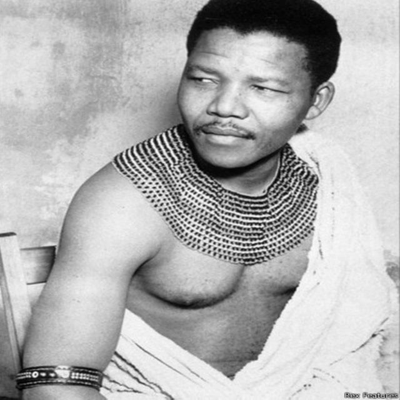

In [48]:
# visualización

imagen = Image.open(req.get(joven_url, stream=True).raw)

imagen.resize((400, 400))

In [49]:
# iniciamos el clasificador de imagenes, los modelos se descargan en local, en este caso son unos 350Mb

img_pipe = pipeline(task=tarea, model=modelo)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [50]:
# respuesta del pipeline

img_pipe(joven_url)

[{'label': '16-20', 'score': 0.739456832408905},
 {'label': '21-25', 'score': 0.7037363648414612},
 {'label': '26-30', 'score': 0.642171323299408},
 {'label': '13-15', 'score': 0.5605804920196533},
 {'label': '36-40', 'score': 0.5533537864685059}]

In [51]:
# imagen viejo Mandela

viejo_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTqCkqmyh8102AHqLrtzSsi1kbeXK9TYqE5IA&s'

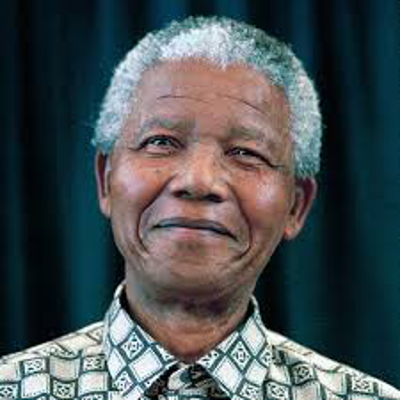

In [52]:
# visualización

imagen = Image.open(req.get(viejo_url, stream=True).raw)

imagen.resize((400, 400))

In [53]:
# respuesta del pipeline

img_pipe(viejo_url)

[{'label': '71-80', 'score': 0.952190101146698},
 {'label': '66-70', 'score': 0.906692624092102},
 {'label': '81-90', 'score': 0.7904906868934631},
 {'label': '61-65', 'score': 0.74952232837677},
 {'label': '56-60', 'score': 0.6589779853820801}]

### 5.2 - Detección de fuego

El siguiente [modelo](https://huggingface.co/EdBianchi/vit-fire-detection) es un modelo entrenado para detectar fuego. Vamos usar una imagen de un [incendio](https://www.riesgozero.ar/wp-content/uploads/2022/08/incendio-edificio-en-llamas-en-la-noche.jpg) y la vamos a comparar con una imagen del [Naranjo de Bulnes](https://www.km77.com/revista/wp-content/uploads/2021/07/17-picos-europa-naranjo-torre-cerredo.jpg) sin fuego en la imagen.

In [54]:
# definimos la tarea y el modelo

tarea = 'image-classification'  

modelo = 'EdBianchi/vit-fire-detection'

In [55]:
# imagen con fuego

fuego = 'https://www.riesgozero.ar/wp-content/uploads/2022/08/incendio-edificio-en-llamas-en-la-noche.jpg'

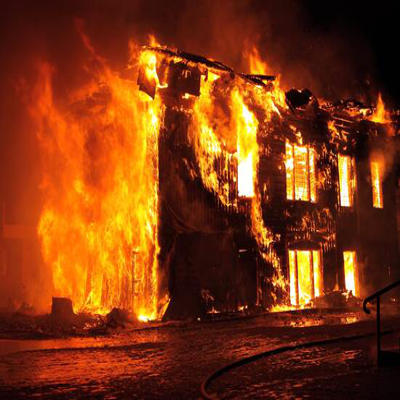

In [56]:
# visualización

imagen = Image.open(req.get(fuego, stream=True).raw)

imagen.resize((400, 400))

In [57]:
# iniciamos el clasificador de imagenes, los modelos se descargan en local, en este caso son unos 350Mb

img_pipe = pipeline(task=tarea, model=modelo)

/opt/anaconda3/envs/ia/lib/python3.9/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [58]:
# respuesta del pipeline

img_pipe(fuego)

[{'label': 'Fire', 'score': 0.9926884174346924},
 {'label': 'Normal', 'score': 0.09102968871593475},
 {'label': 'Smoke', 'score': 0.0521407388150692}]

In [59]:
# imagen sin fuego

sin_fuego = 'https://www.km77.com/revista/wp-content/uploads/2021/07/17-picos-europa-naranjo-torre-cerredo.jpg'

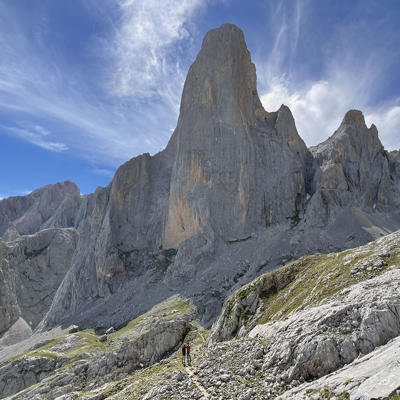

In [60]:
# visualización

imagen = Image.open(req.get(sin_fuego, stream=True).raw)

imagen.resize((400, 400))

In [61]:
# respuesta del pipeline

img_pipe(sin_fuego)

[{'label': 'Normal', 'score': 0.9925248026847839},
 {'label': 'Fire', 'score': 0.08512837439775467},
 {'label': 'Smoke', 'score': 0.07003188133239746}]

### 5.3 - Detección de género

Probaremos otro [modelo](https://huggingface.co/dima806/man_woman_face_image_detection) entrenado para clasificar el género de la persona. Usaremos una imagen de [Cillian Murphy](https://hips.hearstapps.com/hmg-prod/images/cillian-murphy-winner-of-the-best-actor-in-a-leading-role-news-photo-1710125651.jpg?crop=0.667xw:1.00xh;0.167xw,0&resize=1200:*) y la vamos a comparar con una imagen de [Zoe Saldaña](https://imagenes.elpais.com/resizer/v2/https%3A%2F%2Fcloudfront-eu-central-1.images.arcpublishing.com%2Fprisa%2F4J57ZSBDRBHNRAJX62PIUXLUGE.jpg?auth=156352cd6f5e3796a6bd3ead5735070eb9ac3d2be0b1180a4c126fb9f345d27d&width=1200&height=675&smart=true).

In [62]:
# definimos la tarea y el modelo

tarea = 'image-classification'  

modelo = 'dima806/man_woman_face_image_detection'

In [63]:
# imagen Cillian Murphy

hombre = 'https://hips.hearstapps.com/hmg-prod/images/cillian-murphy-winner-of-the-best-actor-in-a-leading-role-news-photo-1710125651.jpg?crop=0.667xw:1.00xh;0.167xw,0&resize=1200:*'

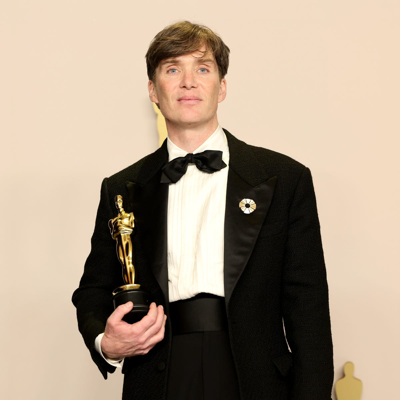

In [64]:
# visualización

imagen = Image.open(req.get(hombre, stream=True).raw)

imagen.resize((400, 400))

In [65]:
# iniciamos el clasificador de imagenes, los modelos se descargan en local, en este caso son unos 350Mb

img_pipe = pipeline(task=tarea, model=modelo)

config.json:   0%|          | 0.00/724 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [66]:
# respuesta del pipeline

img_pipe(hombre)

[{'label': 'man', 'score': 0.8026833534240723},
 {'label': 'woman', 'score': 0.24319037795066833}]

In [67]:
# imagen Zoe Saldaña

mujer = 'https://imagenes.elpais.com/resizer/v2/https%3A%2F%2Fcloudfront-eu-central-1.images.arcpublishing.com%2Fprisa%2F4J57ZSBDRBHNRAJX62PIUXLUGE.jpg?auth=156352cd6f5e3796a6bd3ead5735070eb9ac3d2be0b1180a4c126fb9f345d27d&width=1200&height=675&smart=true'

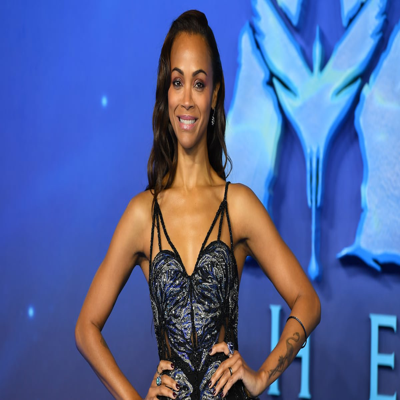

In [68]:
# visualización

imagen = Image.open(req.get(mujer, stream=True).raw)

imagen.resize((400, 400))

In [69]:
# respuesta del pipeline

img_pipe(mujer)

[{'label': 'woman', 'score': 0.8874479532241821},
 {'label': 'man', 'score': 0.10431582480669022}]